# IMPORTING AND LOADING DATASET

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re 
import string 

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv(r"C:\Users\dell\Desktop\kaggle_parsed_dataset.csv")

In [5]:
df

,index,oh_label,Date,Text
0,0,1,20120618192155Z,"""You fuck your dad."""
1,1,0,20120528192215Z,"""i really don't understand your point.\xa0 It ..."
2,2,0,NaN,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,3,0,NaN,"""listen if you dont wanna get married to a man..."
4,4,0,20120619094753Z,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."
...,...,...,...,...
8794,8794,0,20120612003508Z,"""Never really gave it much thought. I just fig..."
8795,8795,0,20120619210456Z,"""Nadie se salva de la regla 34 xd"""
8796,8796,0,20120528234613Z,"""Question: Are you a boy or a girl?"""
8797,8797,1,20120619153537Z,"""Leave your email or phone number and maybe yo..."


In [6]:
df = df.drop(['index','Date'],axis=1)

In [7]:
df.head()

,oh_label,Text
0,1,"""You fuck your dad."""
1,0,"""i really don't understand your point.\xa0 It ..."
2,0,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,0,"""listen if you dont wanna get married to a man..."
4,0,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."


In [8]:
df = df.rename(columns={'oh_label':'class'})

In [9]:
df.dtypes

class     int64
Text     object
dtype: object

In [10]:
df.columns

Index(['class', 'Text'], dtype='object')

In [11]:
df.isna().sum()

class    0
Text     0
dtype: int64

In [12]:
df.describe()

,class
count,8799.000000
mean,0.318900
std,0.466077
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8799 entries, 0 to 8798
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   8799 non-null   int64 
 1   Text    8799 non-null   object
dtypes: int64(1), object(1)
memory usage: 137.6+ KB


# PREPROCESSING THE DATASET

In [14]:

def wordopt(text): 
    #creating function to process text
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub("\\W"," ",text)
    text=re.sub('https?://\S+|www\.\S+','',text)
    text=re.sub('<.*?>+','',text)
    text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*','',text)
    return text

In [15]:
df['Text'] = df['Text'].apply(wordopt)

In [16]:
df

,class,Text
0,1,you fuck your dad
1,0,i really don t understand your point it see...
2,0,a of canadians can and has been wrong bef...
3,0,listen if you dont wanna get married to a man...
4,0,c b xu bi t xecnh c ho kh nc...
...,...,...
8794,0,never really gave it much thought i just fig...
8795,0,nadie se salva de la regla xd
8796,0,question are you a boy or a girl
8797,1,leave your email or phone number and maybe yo...


# DATA VISUALIZATION

In [17]:
%pip install wordcloud
from wordcloud import WordCloud

Note: you may need to restart the kernel to use updated packages.


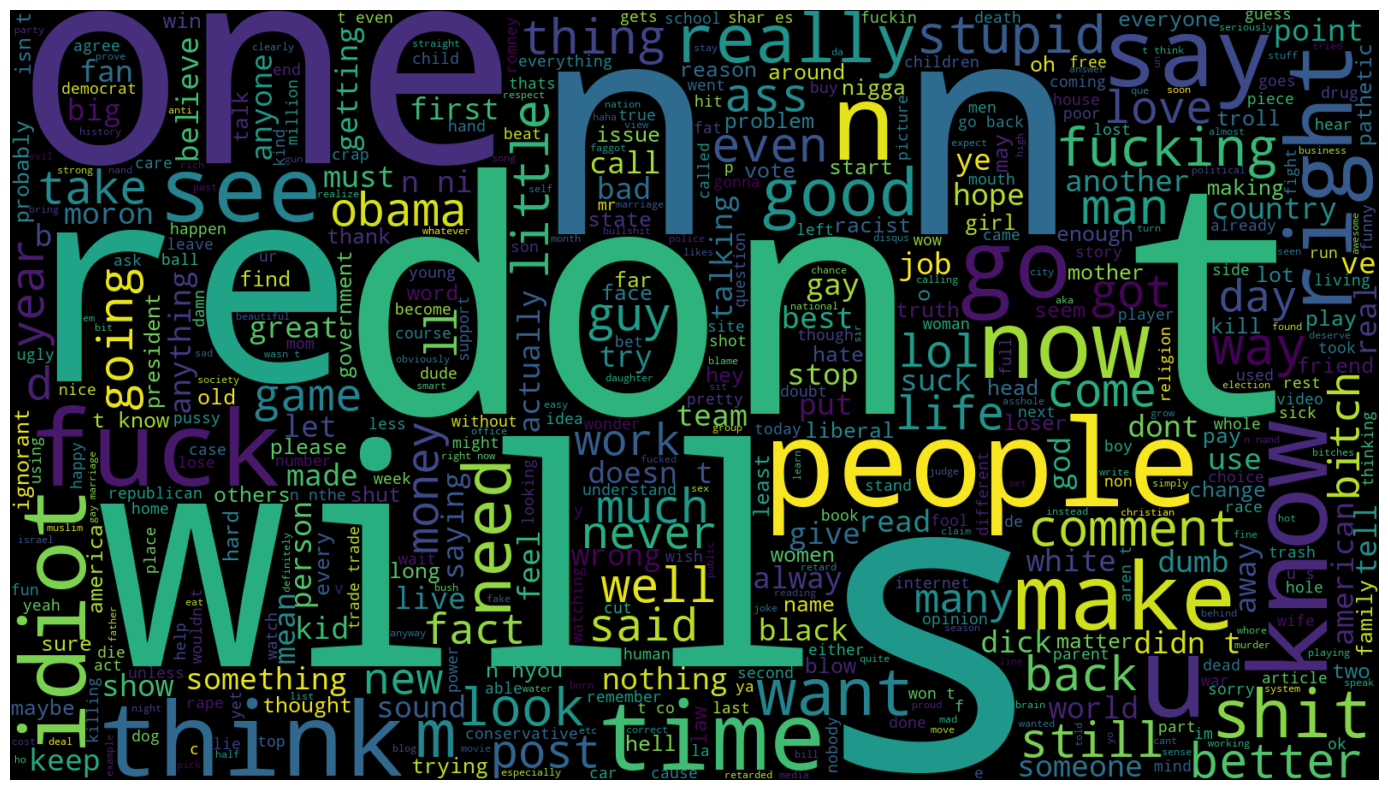

In [18]:
text =' '.join(word for word in df['Text'])
plt.figure(figsize=(20,10),facecolor='none')
wordcloud = WordCloud(max_words=500,height=900,width=1600).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

<Axes: xlabel='class', ylabel='Count'>

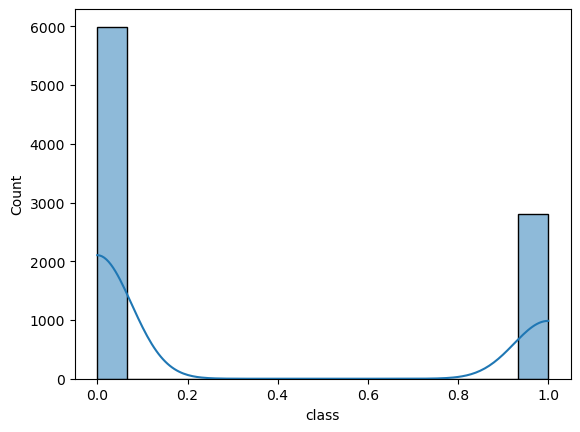

In [71]:
sns.histplot(df['class'],kde=True)

# splitting the dataset


In [19]:
df.head()

,class,Text
0,1,you fuck your dad
1,0,i really don t understand your point it see...
2,0,a of canadians can and has been wrong bef...
3,0,listen if you dont wanna get married to a man...
4,0,c b xu bi t xecnh c ho kh nc...


In [20]:
x = df['Text']
y = df['class']

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [22]:
print(x_train)

1030     sure they will    pitcher does not make or br...
7793                                   you are an idiot  
4742     democrats hate success    and commies like ob...
2498                                    he weak ass fuck 
1755     please stop the money going to pakistan   als...
                              ...                        
5734     we all wish you were leaving because its only...
5191                    what are you talking about   n n 
5390     brian don t know why you are getting at r kel...
860      no fucking way       you can t leave us  can ...
7270     big bang theory and how i shagged your mother...
Name: Text, Length: 6599, dtype: object


In [24]:
print(y_test)

3684    1
7067    0
7445    0
5210    1
3459    0
       ..
8348    0
4996    1
5643    0
5225    1
4975    1
Name: class, Length: 2200, dtype: int64


# vectorization

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()

In [27]:
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [28]:
print(xv_test.shape)
print(xv_train.shape)

(2200, 19182)
(6599, 19182)


# model building

# logestic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [31]:
LR.fit(xv_train,y_train)
y_predLR = LR.predict(xv_test)

In [32]:
print(" the acc score od LR is :", accuracy_score(y_test,y_predLR))

 the acc score od LR is : 0.7995454545454546


# DECISION TREE

In [33]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

In [34]:
DT.fit(xv_train,y_train)
y_predDT = DT.predict(xv_test)

In [35]:
print(" the acc score of DT is :", accuracy_score(y_test,y_predDT))

 the acc score of DT is : 0.740909090909091


# random forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

In [37]:
RF.fit(xv_train,y_train)
y_predRF = RF.predict(xv_test)

In [38]:
print(" the acc score of RF is :", accuracy_score(y_test,y_predRF))

 the acc score of RF is : 0.7772727272727272


# NAIVE BAYES 

In [39]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()

In [40]:
nb = []

for i in [MNB,BNB]:
    i.fit(xv_train,y_train)
    nb.append(accuracy_score(y_test,i.predict(xv_test)))

In [42]:
print(nb)

[0.7159090909090909, 0.7927272727272727]


In [41]:
y_predMNB = MNB.predict(xv_test)

In [43]:
y_predBNB = BNB.predict(xv_test)

# boosting

In [44]:
from sklearn.ensemble import AdaBoostClassifier
ABC = AdaBoostClassifier()
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()

In [46]:
BG = []

for i in [ABC,GBC]:
    i.fit(xv_train,y_train)
    BG.append(accuracy_score(y_test,i.predict(xv_test)))
print(BG)

[0.7877272727272727, 0.7781818181818182]


In [47]:
y_predABC = ABC.predict(xv_test)
y_predGBC = GBC.predict(xv_test)

In [48]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [49]:
from xgboost import XGBClassifier
XGB = XGBClassifier()

In [50]:
XGB.fit(xv_train,y_train)
y_predXGB = XGB.predict(xv_test)

In [51]:
print("the acc score of xgboost is:",accuracy_score(y_test,y_predXGB))

the acc score of xgboost is: 0.8068181818181818


# svm

In [52]:
from sklearn.svm import SVC 
SVM = SVC(kernel='rbf')

In [54]:
SVM.fit(xv_train,y_train)
y_predSVM =SVM.predict(xv_test)

In [55]:
print("the acc score od svm is:", accuracy_score(y_test,y_predSVM))

the acc score od svm is: 0.8095454545454546


# KNNEIGHBORS

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
metric_k = []
neighbors = np.arange(3,14)

for k in neighbors:
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(xv_train,y_train)
    y_predKNN = KNN.predict(xv_test)
    acc = accuracy_score(y_test,y_predKNN)
    metric_k.append(acc)

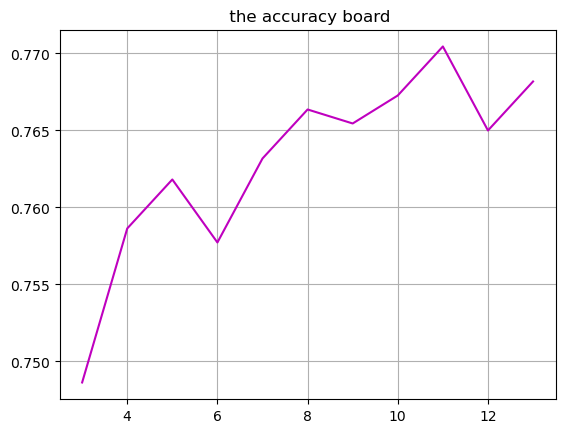

In [60]:
plt.plot(neighbors,metric_k,'m')
plt.title(" the accuracy board")
plt.grid()

In [61]:
# we can take 11 as the k because it have higher accuracy

In [62]:
KNN = KNeighborsClassifier(n_neighbors=11)
KNN.fit(xv_train,y_train)
y_predKNN = KNN.predict(xv_test)

In [63]:
print("the acc score of knn is :", accuracy_score(y_test,y_predKNN))

the acc score of knn is : 0.7704545454545455


# PERFORMANCE ANALYSIS

In [65]:
PT = []

for i in [y_predKNN,y_predLR,y_predDT,y_predRF,y_predMNB,y_predBNB,y_predSVM,y_predABC,y_predGBC,y_predXGB]:
    PT.append(round(accuracy_score(y_test,i)*100,2))
print(PT)

[77.05, 79.95, 74.09, 77.73, 71.59, 79.27, 80.95, 78.77, 77.82, 80.68]


# conclusion

THE SVM MODEL SHOW THE HIGHER ACCURACY WITH AROUND 80.95,ITS THE APPLICABLE MODEL TO THIS DATASET 

In [67]:
df.head(10)

,class,Text
0,1,you fuck your dad
1,0,i really don t understand your point it see...
2,0,a of canadians can and has been wrong bef...
3,0,listen if you dont wanna get married to a man...
4,0,c b xu bi t xecnh c ho kh nc...
5,0,sdl ok but i would hope they d sign him to ...
6,0,yeah and where are you now
7,1,shut the fuck up you and the rest of your fa...
8,1,either you are fake or extremely stupid may...
9,1,that you are an idiot who understands neither...


In [69]:
example = ["listen if you dont wanna get married to a man"]
example_vectorized = vectorization.transform(example)
result = SVM.predict(example_vectorized)

print(result)

if result==0:
    print("not bullying")
else:
    print("bullying")

[0]
not bullying


In [70]:
example = ["shut the fuck up you and the rest of your"]
example_vectorized = vectorization.transform(example)
result = SVM.predict(example_vectorized)

print(result)

if result==0:
    print("not bullying")
else:
    print("bullying")

[1]
bullying
